## Изменение энергии от позиции HARP

Мы сейчас рассмотрим изменение энергии нашей любимой активной области 11158. 


In [5]:
import computing
import pipeline
import numpy as np
import plots
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

Данные по этой штуке были посчитанны в файле [test-newfunc.py](test-newfunc.py) и записаны в следующие файлы - [энергии](<energys_11158_density=2, day=11.txt>), [позиция](<locs_11158_density=2, day=11.txt>) и [дата](dates_11158_11_dens2.txt).

In [15]:
dates = np.loadtxt('energys_11158_density=2, day=11.txt')
xys = np.loadtxt('locs_11158_density=2, day=11.txt')
dates = np.loadtxt('dates_11158_11_dens2.txt', dtype=np.datetime64)
energys, xys, dates = energys[5:], xys[0:].T, dates[6:]

Из-за того, что я неидеально всё сделал, файл energys считываем с шестого, dates с седьмого, xyz с первого.


In [16]:
df = pd.DataFrame({'E': pd.Series(energys),
                   'date': pd.Series(dates),
                   'y': pd.Series(xys[0]),
                   'x': pd.Series(xys[1])})
df.date

0     2011-02-11 06:00:00
1     2011-02-11 07:00:00
2     2011-02-11 08:00:00
3     2011-02-11 09:00:00
4     2011-02-11 11:00:00
              ...        
205                   NaT
206                   NaT
207                   NaT
208                   NaT
209                   NaT
Name: date, Length: 210, dtype: datetime64[ns]

<Axes: xlabel='date'>

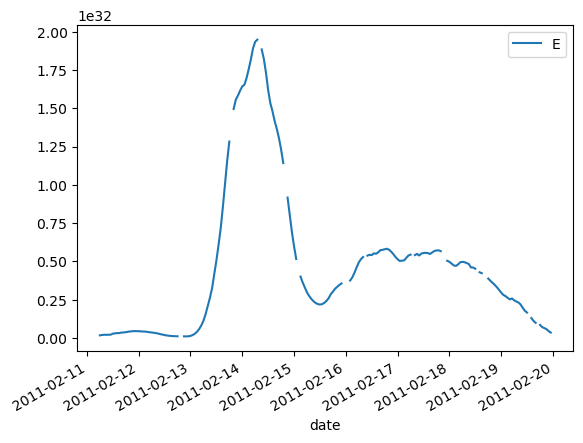

In [26]:
df.plot( 'date', 'E')

[]

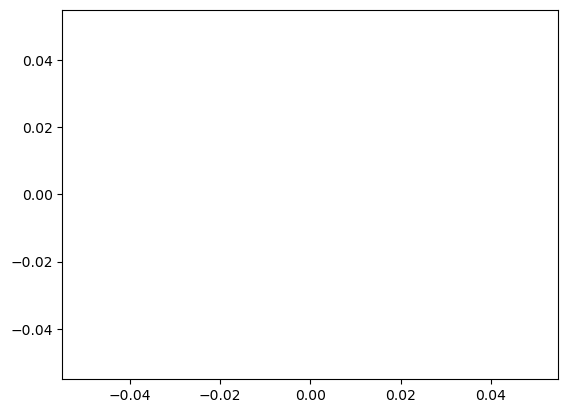

In [18]:
plt.plot()

In [19]:
energys_2 = np.loadtxt('energys_11675_density=2, day=17.txt')
xys_2 = np.loadtxt('locs_11675_density=2, day=17.txt')
dates_2 = np.loadtxt('dates_11675_17_dens2.txt', dtype=np.datetime64)
#energys_2, xys_2, dates_2 = energys_2[5:], xys_2[0:].T, dates_2[6:]

In [20]:
df_2 = pd.DataFrame({'E': pd.Series(dates_2),
                   'date': pd.Series(dates_2),
                   'y': pd.Series(xys_2.T[0]),
                   'x': pd.Series(xys_2.T[1])})

<Axes: xlabel='x'>

<Figure size 640x480 with 0 Axes>

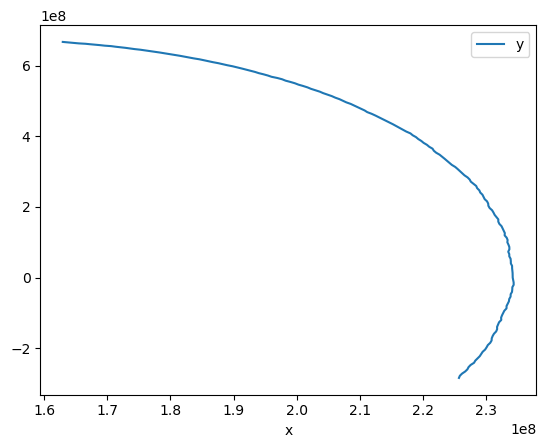

In [21]:
plt.figure()
df_2.plot('x','y')

In [22]:
energys_3 = np.loadtxt('energys_12673_density=2, day=4.txt')
xys_3 = np.loadtxt('locs_12673_density=2, day=4.txt')
dates_3 = np.loadtxt('dates_12673_4_dens2.txt', dtype=np.datetime64)

In [23]:
df_3 = pd.DataFrame({'E': pd.Series(energys_3),
                   'date': pd.Series(dates_3),
                   'y': pd.Series(xys_3.T[0]),
                   'x': pd.Series(xys_3.T[1])})

<Axes: xlabel='date'>

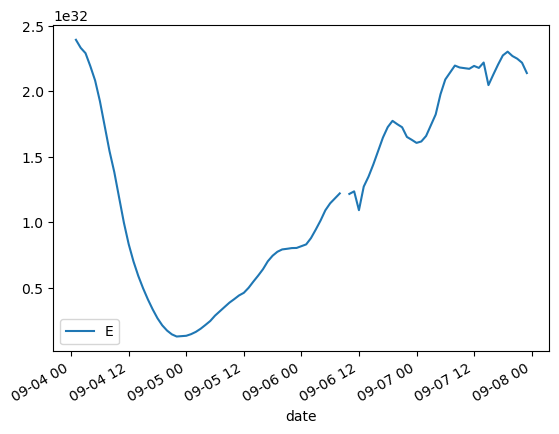

In [24]:
df_3.plot('date','E')

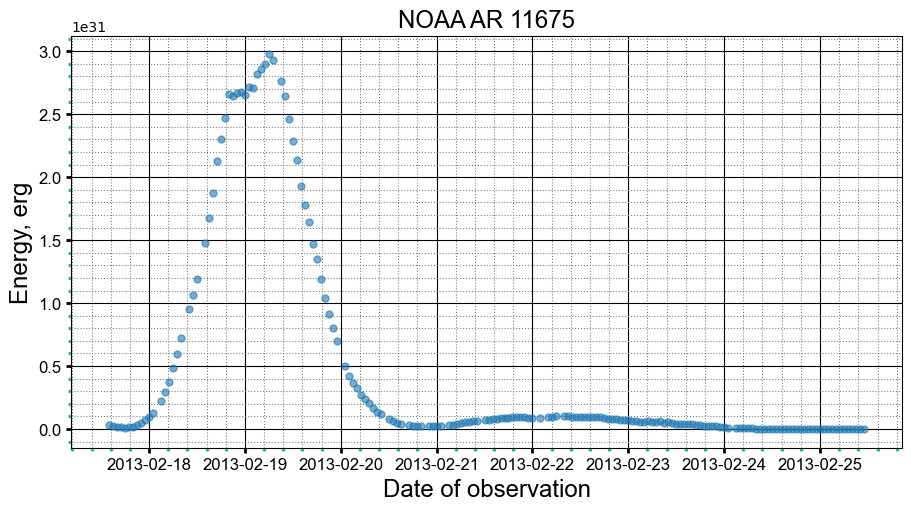

In [25]:
import plots
num = 11675
fig, ax = plots.config(xlabel='Date of observation', ylabel='Energy, erg',
                         title=f'NOAA AR {num}', figsize=(9, 5),
                         dpi=100, grid='minor')
ax.plot(df_2.date, df_2.E,'o', ms=5, alpha=0.6)
fig.savefig(f'{num}.png')

In [60]:
NOAA_AR = 11158
day = 12
added_energys = np.loadtxt('energys_11158_density=3, day=12_added.txt')
added_xys = np.loadtxt('locs_11158_density=3, day=12_added.txt')
added_dates = np.loadtxt('dates_11158_12_dens3_added.txt', dtype=np.datetime64)

init_energys = np.loadtxt(f'energys_{NOAA_AR}_density=3, day={day}_const.txt')
init_xys = np.loadtxt(f'locs_{NOAA_AR}_density=3, day={day}_const.txt')
init_dates = np.loadtxt(f'dates_{NOAA_AR}_{day}_dens3_const.txt', dtype=np.datetime64)

energys = np.append(init_energys, added_energys)
dates = np.append(init_dates, added_dates)
xys = np.append(init_xys, added_xys)

df_sun =  pd.read_csv('sunxudongdata2.csv', header=0, names=['date', 'E'], parse_dates=[0], infer_datetime_format=True)


C:\Users\cosbo\AppData\Local\Temp\ipykernel_24388\409009808.py:15: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_sun =  pd.read_csv('sunxudongdata2.csv', header=0, names=['date', 'E'], parse_dates=[0], infer_datetime_format=True)


<class 'numpy.datetime64'>


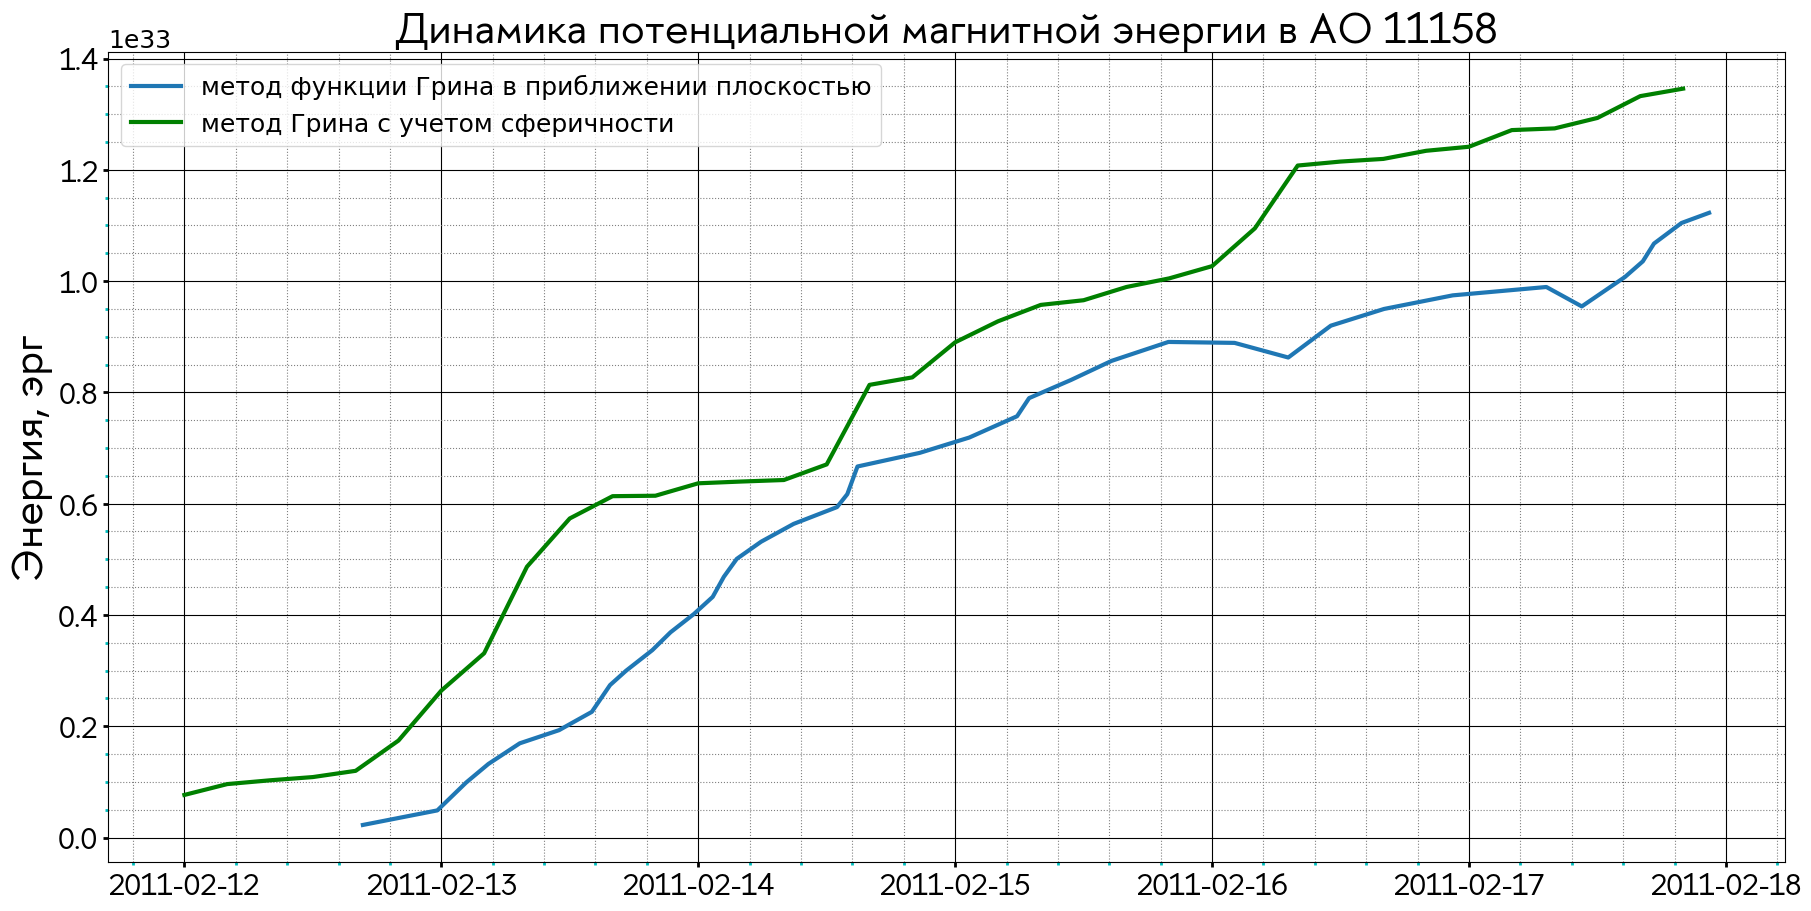

In [62]:
df = pd.DataFrame({'E': pd.Series(init_energys),
                   'date': pd.Series(init_dates),
                   'y': pd.Series(init_xys.T[1]),
                   'x': pd.Series(init_xys.T[0])})
matplotlib.rcParams.update({'font.size': 18})

fig, ax = plots.config(title=f'Динамика потенциальной магнитной энергии в АО {NOAA_AR}',
             xlabel='', ylabel='Энергия, эрг', figsize=(18, 9))
plt.plot(df_sun.date, (df_sun.E+0.6)*1e32, lw=3, label='метод функции Грина в приближении плоскостью')
plt.plot(df.date[:], df.E*np.pi*4*4, lw=3,color='green',  label ='метод Грина с учетом сферичности')
plt.legend(loc='best')

print(type(df_sun.date.values[0]))
fig.savefig('Энергии')

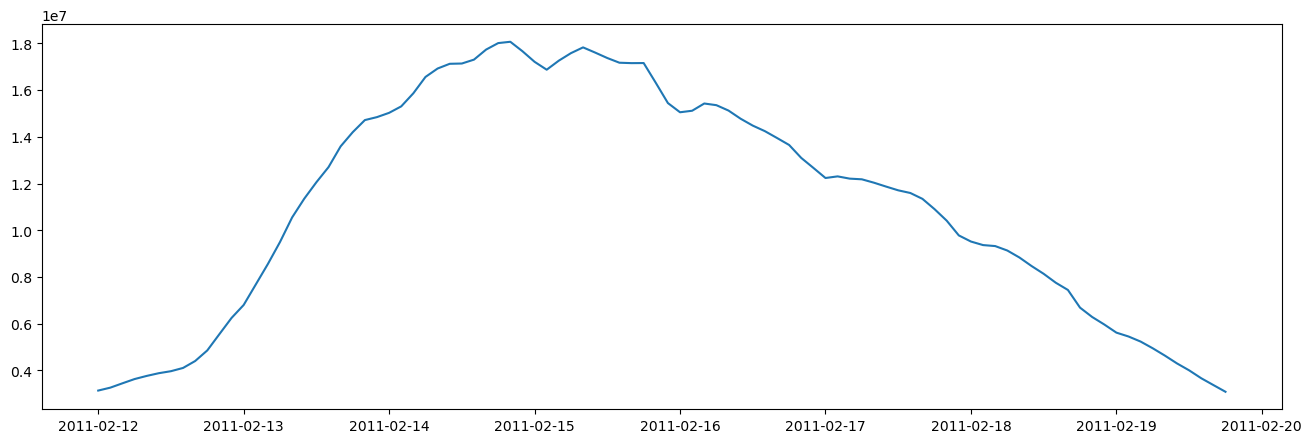

In [11]:
flux_energys = np.loadtxt('surface_flux_11158.txt')
flux_dates = np.loadtxt('dates_11158_12_dens3_flux.txt', dtype=np.datetime64)


flux_df = pd.DataFrame({'flux': pd.Series(flux_energys),
                   'date': pd.Series(flux_dates)})

plt.figure(figsize=(16, 5))
plt.plot(flux_df.date[:], flux_df.flux)